In [ ]:
hdfs namenode -format
hdfs datanode -format
start-dfs.sh
start-yarn.sh

hdfs dfs -mkdir -p /home/engineer            
hdfs dfs -put data/retails/                 
pyspark



# hdfs dfs -rm -r /user/engineer 는 하둡에 올라간  /user/ubuntu/retails 폴더 삭제

In [ ]:

retails = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/user/ubuntu/retails/2010-12-01.csv")

# .option("inferSchema", "true") 스키마 구조를 자동으로 불러오기.장점은 정확성.단점은 느려짐
# 따라서 걍 밑에서처럼 과정을 거치는게 속도면에서 유리할수도.

In [ ]:
retails.printSchema()

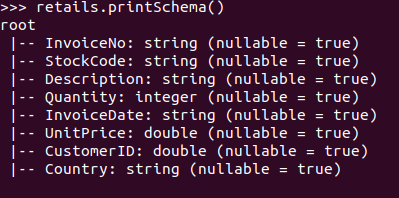

In [ ]:
retails.createOrReplaceTempView("retails")
# retails 스키마를 가지고 새로운 "retails" 생성
# 스키마 구조 따오기

In [ ]:
from pyspark.sql.functions import lit

In [ ]:

retails.select(lit(5), lit("five"), lit(5.0))

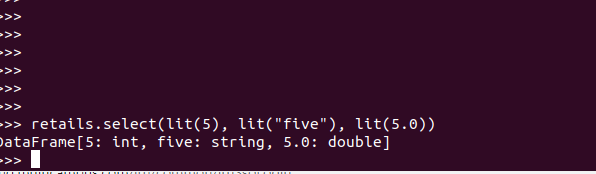

In [ ]:
double은 실수를 의미함(real number)

# 참거짓.boul타입

In [ ]:
from pyspark.sql.functions import col

In [ ]:
retails.where(col("InvoiceNo") != 536365).select("InvoiceNo", "Description").show(5)
# where(col("InvoiceNo") != 536365) 조건식이라서 결국은 참거짓이 됨

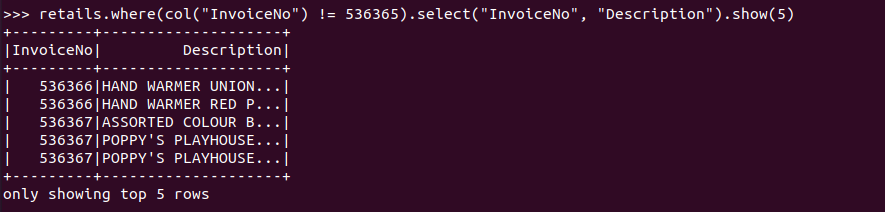

In [ ]:
retails.select("InvoiceNo", "Description").where(col("InvoiceNo") != 536365).show(5, False)
# 생략부분까지 다 나오게 함.

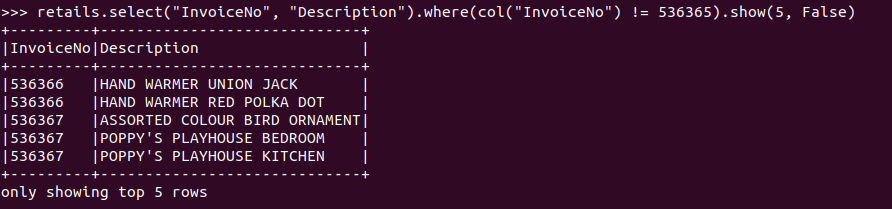

In [ ]:
 # 데이터 프레임 형식은 where와 select쓰는 순서 상관없음

In [ ]:
retails.where("InvoiceNo != 536365").show(5)
retails.where("InvoiceNo <> 536365").show(5)
# 따로 select조건 안주면 전체 선택으로 생각함.

In [ ]:
from pyspark.sql.functions import instr
price_filter = col("UnitPrice") > 600
descript_filter = instr(retails.Description,"POSTAGE") >= 1
dot_code_filter = col("StockCode") == "DOT"
9월 8일 10:27분수업부터 이어서할껏.